<a href="https://colab.research.google.com/github/stacykeago/CORE-MODULE-2.-WEEK-1/blob/main/Stacy_Keago_week_6_Core_Independent_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the data

- Import the libraries
- Load the data
-Preview the dataset
-Data description
-Data shape

## Import the libraries

In [98]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression


## Load the datasets

In [99]:
#Load the data https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc
#Results dataset = https://drive.google.com/file/d/1tJ15lGZL0MYCIxKAUWJFw_BttFgpeufT/view?usp=sharing
# Fifa ranking dataset  https://drive.google.com/file/d/1LZvdUnhTP1pMANJIo_kgn1uN13eRsI0o/view?usp=sharing


In [100]:
#load the fifa dataset
fifa = pd.read_csv('/content/fifa_ranking.csv')
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [101]:
#load the results dataset
results = pd.read_csv('/content/results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [102]:
#displaying the dataset
# results shape
results.shape

(40839, 9)

In [103]:
# fifa data shape
fifa.shape

(57793, 16)

In [104]:
#Describe the data
#Describe the fifa dataset
fifa.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [105]:
# Describe the results dataset
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


## Unique values

In [106]:
fifa.nunique()

rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64

In [107]:
results.nunique()

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64

# Exploratory Data Analysis

### Define the question


You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

### Metric for success


Approach 1: Polynomial approach

What to train given:
1. Rank of home team
2. Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores.
Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

#### drop some columns 

In [110]:
# Drop some columns
#fifa.drop(['country_abrv', 'rank_date', 'date', 'city'], axis=1, inplace=True) 
#.head()
fifa.drop(columns=['country_abrv', 'rank_date']) 
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [113]:
results.drop(columns=['date', 'city'])
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


#### Outliers


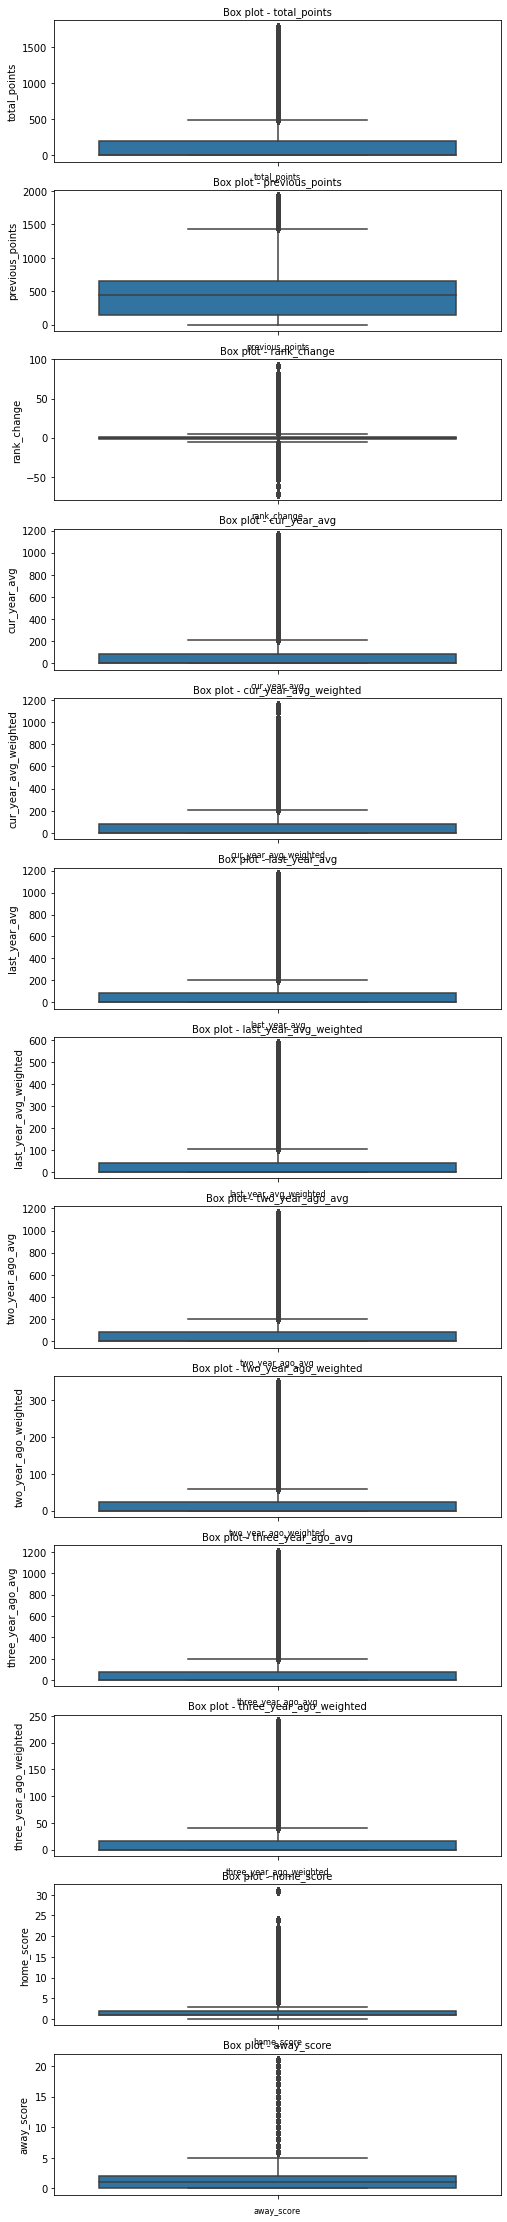

In [72]:
# Checking for outliers for fifa dataset
col_names =['total_points', 'previous_points', 'rank_change', 'cur_year_avg','cur_year_avg_weighted', 
            'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
            'three_year_ago_avg','three_year_ago_weighted','home_score', 'away_score']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=fifa[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

#### Missing data 


In [114]:
#check for null values in NEW
fifa.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [115]:
# check for null values in 'results' dataset
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [132]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [131]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


### CONCLUSION

1. There are no Null values in 'Fifa' and 'Results datasets
2. Home score data on the 'Results dataset' has outliers
3. Away score on the 'Results dataset' has outliers

## Linear regression

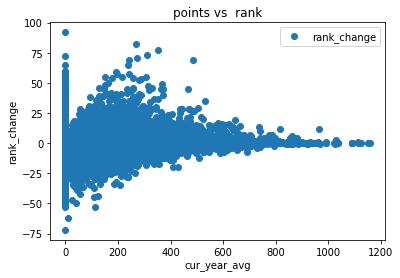

In [147]:
fifa.plot(x='cur_year_avg', y='rank_change', style='o')
plt.title('points vs  rank')
plt.xlabel('cur_year_avg')
plt.ylabel('rank_change')
plt.show()

There is a relationship between current year average and the possibility of rank change.

In [149]:
from sklearn.model_selection import train_test_split

X = fifa['cur_year_avg'].values.reshape(-1, 1)
y = fifa['rank_change'].values#.reshape(-1, 1)

# Use 20% of the data as test
# The rest will be our training set
cur_year_avg_train, cur_year_avg_test, rank_change_train, rank_change_test = train_test_split(X, y, test_size=0.2, random_state=0)

 create a regressor object, and train it using our train data

In [153]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(cur_year_avg_train, rank_change_train)

LinearRegression()

In [154]:
#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

-0.13957481821951284
[0.0018454]


 build a linear regression model to predict admission chance based on curren year average results. First, we set up our train and test datasets

In [158]:

X = fifa['cur_year_avg'].values.reshape(-1, 1)
y = fifa['rank_change'].values

# Use 40% of the data as test
# The rest will be our training set

cur_year_avg_train, cur_year_avg_test, rank_change_train, rank_change_test = train_test_split(X, y, test_size=0.4, random_state=0)

create a regressor object, and train it using our train data

In [160]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(cur_year_avg_train, rank_change_train)

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

-0.15563795383216122
[0.0019163]


In [ ]:
We will have the model predict chances of rank change based on those cur_year_average scores we set aside,
 then compare that to the actual chances from the original dataset.

In [164]:
rank_change_predict = regressor.predict(cur_year_avg_test)

comparison_frame = pd.DataFrame({'Actual': rank_change_test.flatten(), 'Predicted': rank_change_predict.flatten()}) 

comparison_frame.describe()

,Actual,Predicted
count,23118.000000,23118.000000
mean,0.034259,-0.034028
std,5.750523,0.268832
min,-49.000000,-0.155638
25%,-2.000000,-0.155638
50%,0.000000,-0.155638
75%,1.000000,-0.088553
max,77.000000,2.054089


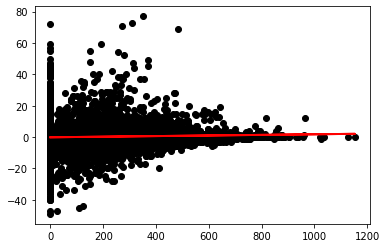

In [166]:
plt.scatter(cur_year_avg_test, rank_change_test, color='black')
plt.plot(cur_year_avg_test, rank_change_predict, color='red', linewidth=2) 
plt.show()

In [169]:

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(rank_change_test, rank_change_predict))  

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(rank_change_test, rank_change_predict))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(rank_change_test, rank_change_predict)))

Mean Absolute Error: 3.1181962579909053
Mean Squared Error: 32.99534826124968
Root Mean Squared Error: 5.744157750379918


Including more independent variables to test further
Lets include the last year average score plus current year

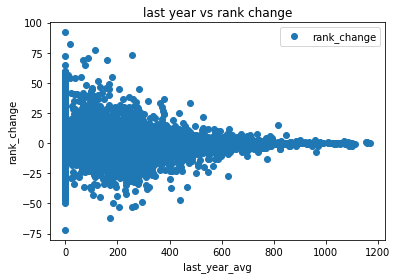

In [174]:

fifa.plot(x='last_year_avg', y='rank_change', style='o' )
plt.title('last year vs rank change')
plt.xlabel('last_year_avg')
plt.ylabel('rank_change')
plt.show()

In [175]:
X = fifa[['cur_year_avg', 'last_year_avg']].values 
y = fifa['rank_change'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression()

In [177]:
# To check the coefficients used by our model, as they indicate 
# how heavily each independent variable contributes to the dependent variable
regressor.coef_

array([ 0.00875088, -0.00824226])

In [179]:
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1660489553102997
Mean Squared Error: 33.79499997545348
Root Mean Squared Error: 5.81334671041161


In [182]:
# let's compare our predicted results to the actual data from the test set:
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})     

comparison_frame.describe()


,Actual,Predicted
count,11559.000000,11559.000000
mean,0.057963,-0.032407
std,5.845291,0.675740
min,-47.000000,-6.200761
25%,-2.000000,-0.065949
50%,0.000000,-0.065949
75%,1.000000,-0.065949
max,73.000000,5.582349


### Recommendation

# Polynomial Regression Analysis

This type of logistic regression is Ordinal since it gives us one of the following three options(win. lose. draw)

In [117]:
import seaborn as sb

# Logistic Regression